In [1]:
#Sometimes the jupyter kernel has issues in locating package, so adding the virtual env to sys path may be required
import sys
#Rename according to your virtual - env name
sys.path.append('/usr/local/anaconda3/envs/mob-reg/lib/python3.7/site-packages')

In [2]:
import matplotlib

In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'1.15.0'

# Extracting VGG keypoints trial ( this part is not needed for mobilenet implementation) (Requires TF version 1.x)

In [5]:
from __future__ import print_function
import Registration
import matplotlib.pyplot as plt
from utils.utils import *
import cv2

In [6]:

# designate image path here
IX_path = '39-l.jpg'
IY_path = '39-r.jpg'

IX = cv2.imread(IX_path)
IY = cv2.imread(IY_path)

print(IX)

#initialize
from timeit import default_timer as timer
start = timer()
reg = Registration.CNN()
#register
X, Y, Z = reg.register(IX, IY)
#generate regsitered image using TPS
registered = tps_warp(Y, Z, IY, IX.shape)
cb = checkboard(IX, registered, 11)
end = timer()

print(end-start)

[[[ 73  81  34]
  [ 70  80  33]
  [ 68  84  37]
  ...
  [ 69  94  50]
  [ 69  92  48]
  [ 63  83  40]]

 [[ 95 107  59]
  [ 68  82  34]
  [ 64  82  35]
  ...
  [ 62  87  43]
  [ 66  89  45]
  [ 71  91  48]]

 [[ 91 113  64]
  [ 82 104  55]
  [ 77  99  51]
  ...
  [ 57  81  39]
  [ 63  85  43]
  [ 71  91  49]]

 ...

 [[ 32  63  36]
  [  9  40  13]
  [  6  39  12]
  ...
  [ 55 124  87]
  [ 49 117  82]
  [ 43 111  76]]

 [[ 30  58  29]
  [  3  33   4]
  [  8  42  12]
  ...
  [ 66 137  97]
  [ 51 121  84]
  [ 39 109  72]]

 [[ 34  60  30]
  [ 13  44  13]
  [ 13  47  17]
  ...
  [ 62 135  95]
  [ 58 131  91]
  [ 57 130  92]]]

/Users/karthik/mobilenet-reg/src/vgg16partial.npy



finish: itr 36, Q -543, tau 1
22.463009489


In [6]:
IX_path = '35-l.jpg'
IY_path = '35-r.jpg'

IX = cv2.imread(IX_path)
IY = cv2.imread(IY_path)

In [7]:
reg = Registration.CNN()
#register
X,Y= reg.register(IX, IY)


/Users/karthik/mobilenet-reg/src/vgg16partial.npy





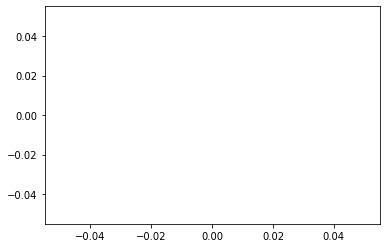

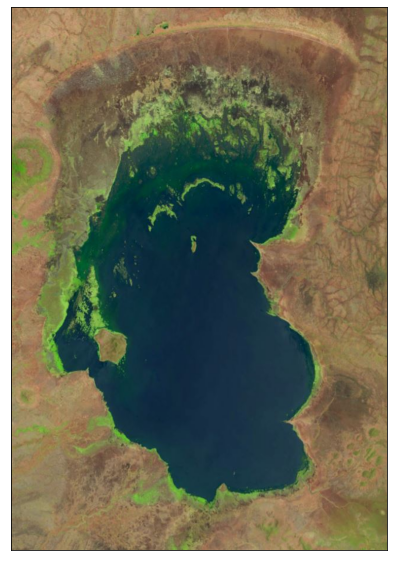

In [8]:
plt.plot()
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
#plt.title('Image Registration VGG')
plt.imshow(cv2.cvtColor(IY, cv2.COLOR_BGR2RGB))

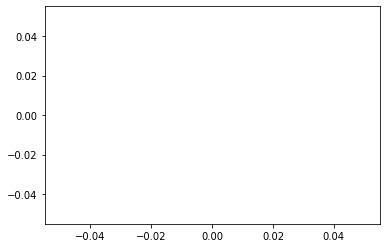

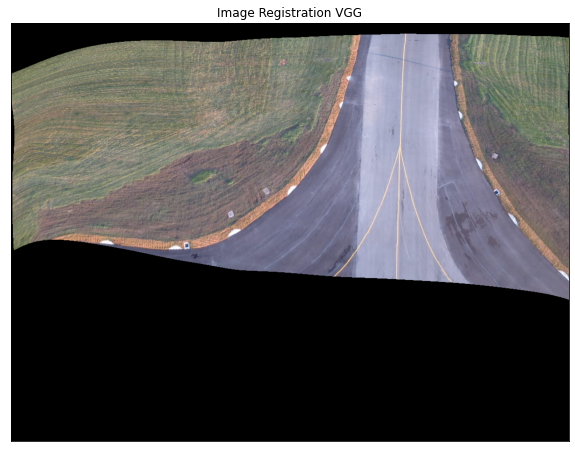

In [8]:
plt.plot()
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.title('Image Registration VGG')
plt.imshow(cv2.cvtColor(registered, cv2.COLOR_BGR2RGB))

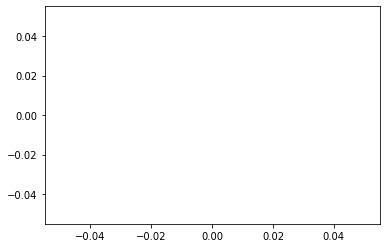

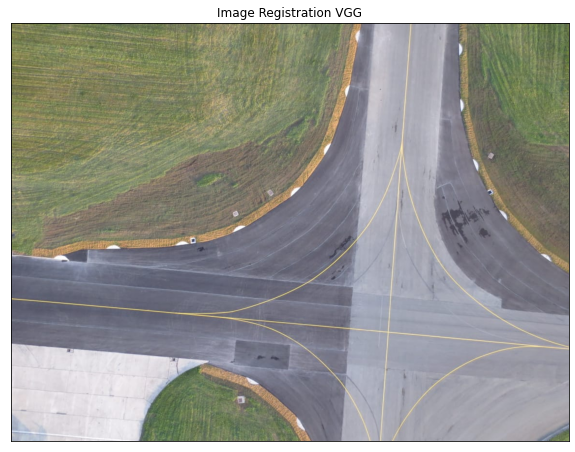

In [9]:
plt.plot()
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.title('Image Registration VGG')
plt.imshow(cv2.cvtColor(IX, cv2.COLOR_BGR2RGB))

In [8]:
cv2.imwrite('vgg.jpg', cv2.cvtColor(cb, cv2.COLOR_BGR2RGB))

True

In [ ]:
import Registration2

In [ ]:
A.shape

In [ ]:
F.shape

In [ ]:
reg.register(IX, IY)[2].shape

In [ ]:
IX.shape

In [ ]:
np.expand_dims(IX, axis=0).shape

In [ ]:
np.concatenate((np.expand_dims(IY, axis=0),np.expand_dims(IY, axis=0)),axis=0).shape

In [ ]:
reg.register(IX, IY)

In [ ]:
F.shape

In [ ]:
F[48]

In [ ]:
import cv2 as cv

In [ ]:
akaze = cv.AKAZE_create()
# Find the keypoints and descriptors with SIFT
kp1, des1 = akaze.detectAndCompute(IX, None)
kp2, des2 = akaze.detectAndCompute(IY, None)

In [ ]:
IX.shape

In [ ]:
type(kp1)

In [ ]:
des1.shape

In [ ]:
hello[0].shape

In [ ]:
hello[5].shape

In [ ]:
bf = cv.BFMatcher()
matches = bf.knnMatch(hello[4], hello[5], k=2)

In [ ]:
good_matches = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good_matches.append([m])

In [ ]:
img3 = cv.drawMatchesKnn(IX,kp1,IY,kp2,good_matches,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv.imwrite('matches.jpg', img3)

In [ ]:
plt.imshow(img3)

# Mobilenet Implementation with keras

In [5]:
#import necessary libraries
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

In [6]:
tf.__version__

'2.4.1'

## Preprocessing

In [7]:
import keras

In [8]:
from PIL import Image, ImageDraw

In [9]:
mobile = keras.applications.mobilenet.MobileNet()
def prepare_image(file):
    img_path = '/Users/karthik/Downloads/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [10]:
preprocessed_image = prepare_image('g.jpeg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n03788365', 'mosquito_net', 0.22788794),
  ('n04532670', 'viaduct', 0.1438762),
  ('n02795169', 'barrel', 0.1021792),
  ('n03160309', 'dam', 0.051732883),
  ('n03249569', 'drum', 0.049637094)]]

In [11]:
img_path = '/Users/karthik/Downloads/'
img = image.load_img(img_path + 'g.jpeg', target_size=(224, 224))
img_array = image.img_to_array(img)
img_array_expanded_dims = np.expand_dims(img_array, axis=0)

In [12]:
img_array.shape

(224, 224, 3)

In [13]:
img_array_expanded_dims.shape

(1, 224, 224, 3)

In [14]:
img_array.shape

(224, 224, 3)

In [15]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [16]:
def ret_descriptors(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    preprocessed_image = keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)
    predictions = mobile.predict(preprocessed_image)
    results = imagenet_utils.decode_predictions(predictions)
    get_layer_output_1= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_1').output])
    get_layer_output_2= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_2').output])
    get_layer_output_3= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_3').output])
    get_layer_output_4= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_4').output])
    get_layer_output_5= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_5').output])
    get_layer_output_6= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_6').output])
    get_layer_output_7= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_7').output])
    get_layer_output_8= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_8').output])
    get_layer_output_9= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_9').output])
    get_layer_output_10= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_10').output])
    get_layer_output_11= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_11').output])
    get_layer_output_12= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_12').output])
    get_layer_output_13= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_13').output])
    layer_output1 = (get_layer_output_1(preprocessed_image))[0]
    layer_output2 = (get_layer_output_2(preprocessed_image))[0]
    layer_output3 = (get_layer_output_3(preprocessed_image))[0]
    layer_output4 = (get_layer_output_4(preprocessed_image))[0]
    layer_output5 = (get_layer_output_5(preprocessed_image))[0]
    layer_output6 = (get_layer_output_6(preprocessed_image))[0]
    layer_output7 = (get_layer_output_7(preprocessed_image))[0]
    layer_output8 = (get_layer_output_8(preprocessed_image))[0]
    layer_output9 = (get_layer_output_9(preprocessed_image))[0]
    layer_output10 = (get_layer_output_10(preprocessed_image))[0]
    layer_output11 = (get_layer_output_11(preprocessed_image))[0]
    layer_output12 = (get_layer_output_12(preprocessed_image))[0]
    layer_output13 = (get_layer_output_13(preprocessed_image))[0]
    return [np.reshape(layer_output1, [-1, 64])/np.std(np.reshape(layer_output1[0], [-1, 64])),np.reshape(layer_output2[0], [-1, 128])/np.std(np.reshape(layer_output2[0], [-1, 128])),np.reshape(layer_output3[0], [-1, 128])/np.std(np.reshape(layer_output3[0], [-1, 128])), np.reshape(layer_output4[0], [-1, 256])/np.std(np.reshape(layer_output4[0], [-1, 256])),np.reshape(layer_output5[0], [-1, 256])/np.std(np.reshape(layer_output5[0], [-1, 256])), np.reshape(layer_output6[0], [-1, 512])/np.std(np.reshape(layer_output6[0], [-1, 512])), np.reshape(layer_output7[0], [-1, 512])/np.std(np.reshape(layer_output7[0], [-1, 512])),np.reshape(layer_output8[0], [-1, 512])/np.std(np.reshape(layer_output8[0], [-1, 512])), np.reshape(layer_output9[0], [-1, 512])/np.std(np.reshape(layer_output9[0], [-1, 512])), np.reshape(layer_output10[0], [-1, 512])/np.std(np.reshape(layer_output10[0], [-1, 512])), np.reshape(layer_output11[0], [-1, 512])/np.std(np.reshape(layer_output11[0], [-1, 512])), np.reshape(layer_output12[0], [-1, 1024])/np.std(np.reshape(layer_output12[0], [-1, 1024])), np.reshape(layer_output13[0], [-1, 1024])/np.std(np.reshape(layer_output13[0], [-1, 1024]))]

In [17]:
import numpy as np

In [18]:
from __future__ import print_function
import time
import gc
from utils.utils import *
import cv2
from utils.shape_context import ShapeContext
import matplotlib.pyplot as plt

In [19]:
from lap import lapjv

In [20]:
import math

In [21]:
def register(IX_name,IY_name):
    [D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13]=ret_descriptors(IX_name)
    [F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13]=ret_descriptors(IY_name)
    height = 224
    width = 224
    shape = np.array([224.0, 224.0])
    sift_weight = 2.0
    cnn_weight = 1.0
    max_itr = 200
    tolerance = 1e-2
    freq = 5 # k in the paper
    epsilon = 0.5
    omega = 0.5
    lambd = 0.5

    PD1=pairwise_distance(D5,F5)
    PD2=pairwise_distance(D4,F4)
    PD3=pd_expand(pairwise_distance(D6,F6),2)
    PD4=pd_expand(pairwise_distance(D7,F7),2)
    PD6=pd_expand(pairwise_distance(D8,F8),2)
    PD7=pd_expand(pairwise_distance(D9,F9),2)
    PD8=pd_expand(pairwise_distance(D10,F10),2)
    PD9=pd_expand(pairwise_distance(D11,F11),2)
    PD10=pd_expand(pairwise_distance(D12,F12),4)
    PD11=pd_expand(pairwise_distance(D13,F13),4)
    PD=PD1+PD8+PD10
    
    seq = np.array([[i, j] for i in range(28) for j in range(28)], dtype='int32')

    X = np.array(seq, dtype='float32') * 8.0 + 4.0
    Y = np.array(seq, dtype='float32') * 8.0 + 4.0
    

    # normalize
    #X = (X - 112.0) / 224.0
    #Y = (Y - 112.0) / 224.0

    # prematch and select points
    C_all, quality = match(PD)
    tau_max = np.max(quality)
    while np.where(quality >= tau_max)[0].shape[0] <= 128: tau_max -= 0.01

    C = C_all[np.where(quality >= tau_max)]
    cnt = C.shape[0]

    # select prematched feature points
    X, Y = X[C[:, 1]], Y[C[:, 0]]
    #return(X,Y)


    PD = PD[np.repeat(np.reshape(C[:, 1], [cnt, 1]), cnt, axis=1),
            np.repeat(np.reshape(C[:, 0], [1, cnt]), cnt, axis=0)]
  

    N = X.shape[0]
    M = X.shape[0]
    assert M == N
   

    # precalculation of feature match
    C_all, quality = match(PD)

    # compute \hat{\theta} and \delta
    tau_min = np.min(quality)
    tau_max = np.max(quality)
    while np.where(quality >= tau_max)[0].shape[0] <= 0.5 * cnt: tau_max -= 0.01
    tau = tau_max
    delta = (tau_max - tau_min) / 10.0

    SCX = ShapeContext().compute(X)

    # initialization
    Z = Y.copy()
    GRB = gaussian_radial_basis(Y, 2.0)
    A = np.zeros([M, 2])
    sigma2 = init_sigma2(X, Y)

    Pr = None

    Q = 0
    dQ = float('Inf')
    itr = 1

    # registration process
    while itr < max_itr and abs(dQ) > tolerance and sigma2 > 1e-4:
        Z_old = Z.copy()
        Q_old = Q

        # for every k iterations
        if (itr - 1) % freq == 0:
            # compute C^{conv}_{\theta}
            C = C_all[np.where(quality >= tau)]
            Lt = PD[C[:, 0], C[:, 1]]
            maxLt = np.max(Lt)
            if maxLt > 0: Lt = Lt / maxLt
            L = np.ones([M, N])
            L[C[:, 0], C[:, 1]] = Lt

            # compute C^{geo}_{\theta}
            SCZ = ShapeContext().compute(Z)
            SC_cost = ShapeContext().cost(SCZ, SCX)

            # compute C
            L = L * SC_cost

            # linear assignment
            C = lapjv(L)[1]

            # prior probability matrix
            Pr = np.ones_like(PD) * (1.0 - epsilon) / N
            Pr[np.arange(C.shape[0]), C] = 1.0
            Pr = Pr / np.sum(Pr, axis=0)

            tau = tau - delta
            if tau < tau_min: tau = tau_min

        # compute minimization
        Po, P1, Np, tmp, Q = compute(X, Y, Z_old, Pr, sigma2, omega)
        Q = Q + lambd / 2 * np.trace(np.dot(np.dot(A.transpose(), GRB), A))

        # update variables
        dP = np.diag(P1)
        t1 = np.dot(dP, GRB) + lambd * sigma2 * np.eye(M)
        t2 = np.dot(Po, X) - np.dot(dP, Y)
        A = np.dot(np.linalg.inv(t1), t2)
        sigma2 = tmp / (2.0 * Np)
        omega = 1 - (Np / N)
        if omega > 0.99: omega = 0.99
        if omega < 0.01: omega = 0.01
        Z = Y + np.dot(GRB, A)
        lambd = lambd * 0.95
        if lambd < 0.1: lambd = 0.1

        dQ = Q - Q_old
        itr = itr + 1

    print('finish: itr %d, Q %d, tau %d' % (itr, Q, tau))
    Xscale = 1.0 * np.array(IX.shape[:2]) / shape
    Yscale = 1.0 * np.array(IY.shape[:2]) / shape
    return(((X*224.0)+112.0)*Xscale, ((Y*224.0)+112.0)*Yscale, ((Z*224.0)+112.0)*Xscale)


In [22]:
IX_path = '12-l.jpg'
IY_path = '12-r.jpg'
# /Users/karthik/Downloads/h.jpeg

IX = cv2.imread(IX_path)
IY = cv2.imread(IY_path)

In [22]:
import cv2 as cv

In [63]:
from timeit import default_timer as timer
start = timer()
X, Y, Z = register(IX_path,IY_path)
#generate regsitered image using TPS
registered = tps_warp(Y, Z, IY, IX.shape)
cb = checkboard(IX, registered)
end=timer()
print(end-start)


0.48214287
finish: itr 55, Q -722, tau 1
47.27143151899986


"plt.subplot(131)\nplt.title('reference')\nplt.imshow(cv.cvtColor(IX, cv.COLOR_BGR2RGB))\nplt.subplot(132)\nplt.title('registered')\nplt.imshow(cv.cvtColor(registered, cv.COLOR_BGR2RGB))\nplt.subplot(133)\nplt.title('checkboard')\nplt.imshow(cv.cvtColor(cb, cv.COLOR_BGR2RGB))\nplt.show() "

# Code for attempting feature prematching

In [8]:
from scipy import io

In [9]:
from PIL import Image

In [10]:
import cv2 as cv

In [11]:
import math

In [26]:
(X, Y) = register('35-l.jpg','35-r.jpg')#Replace with register module of VGG when testing for VGG prematching

In [12]:
from scipy import io
image=Image.open('35-l.jpg')
width, height = image.size
mat1 = io.loadmat('35.mat')
((mat1['point1'])[:,0])=(((mat1['point1'])[:,0])/width)*224
((mat1['point1'])[:,1])=(((mat1['point1'])[:,1])/height)*224
((mat1['point2'])[:,0])=(((mat1['point2'])[:,0])/width)*224
((mat1['point2'])[:,1])=(((mat1['point2'])[:,1])/height)*224
mat2 = io.loadmat('35-completed.mat')
len(mat1['point1'].astype('int'))
dict1={}
dict2={}
for i in range(len(mat1['point1'])):
    if(mat2['GroundTruth'][i]==1):
        dict1[(mat1['point1'][i][0],mat1['point1'][i][1])]=(mat1['point2'][i][0],mat1['point2'][i][1])
for i in range(len(X)):
    dict2[(X[i][0],X[i][1])]=(Y[i][0],Y[i][1])
s=0
visited={}
for k2 in dict2:
    for k1 in dict1:
        dist1=math.sqrt( ((k1[0]-k2[0])**2)+((k1[1]-k2[1])**2) )
        dist2=math.sqrt( ((dict2[k2][0]-dict1[k1][0])**2)+((dict2[k2][1]-dict1[k1][1])**2) )
        if( (math.sqrt(dist1**2+dist2**2)<25) and k1 not in visited ):
            s+=1
            visited[k1]=1
            break


In [23]:
# No. of pairs both detected by our method and present in actual results
s

0

In [62]:
dict1

{(13.300722, 270.2759): (2.2491474, 342.60837),
 (19.680664, 251.75204): (8.751531, 315.7242),
 (24.36299, 282.1686): (23.325094, 335.21387),
 (24.412552, 242.70319): (13.575039, 300.3198),
 (27.24357, 301.74124): (31.619328, 347.1274),
 (27.304293, 248.61682): (19.180126, 302.07755),
 (28.291769, 236.69719): (18.285757, 287.81738),
 (29.113634, 282.22968): (29.839989, 328.45535),
 (29.315765, 243.99683): (21.03893, 293.72806),
 (29.74361, 301.9675): (35.158524, 343.39923),
 (30.511932, 289.13702): (33.417534, 331.77167),
 (31.48758, 227.14442): (21.088327, 275.92227),
 (31.892593, 292.79703): (36.24506, 332.37665),
 (32.56018, 295.29852): (37.74321, 333.84296),
 (32.632362, 225.20256): (21.969404, 272.68213),
 (33.0336, 229.89105): (23.445303, 277.27957),
 (33.735054, 281.41772): (36.349396, 321.12878),
 (34.151134, 282.1953): (37.042763, 320.43307),
 (34.733536, 211.4988): (21.922462, 257.25797),
 (34.749084, 262.0032): (33.61634, 302.8086),
 (35.311523, 265.69363): (35.21172, 304.53

In [63]:
dict2

{(4.0, 4.0): (4.0, 4.0),
 (4.0, 12.0): (4.0, 12.0),
 (4.0, 20.0): (4.0, 28.0),
 (4.0, 68.0): (4.0, 44.0),
 (4.0, 108.0): (4.0, 68.0),
 (4.0, 116.0): (4.0, 92.0),
 (4.0, 204.0): (4.0, 156.0),
 (12.0, 12.0): (12.0, 12.0),
 (12.0, 20.0): (12.0, 28.0),
 (12.0, 68.0): (12.0, 36.0),
 (12.0, 76.0): (12.0, 44.0),
 (12.0, 100.0): (12.0, 76.0),
 (12.0, 116.0): (12.0, 92.0),
 (20.0, 68.0): (20.0, 36.0),
 (20.0, 76.0): (20.0, 52.0),
 (20.0, 108.0): (20.0, 84.0),
 (28.0, 124.0): (28.0, 108.0),
 (28.0, 68.0): (28.0, 44.0),
 (28.0, 76.0): (28.0, 52.0),
 (28.0, 92.0): (28.0, 68.0),
 (28.0, 100.0): (28.0, 84.0),
 (44.0, 196.0): (28.0, 148.0),
 (44.0, 204.0): (28.0, 156.0),
 (36.0, 68.0): (36.0, 44.0),
 (76.0, 108.0): (36.0, 76.0),
 (44.0, 124.0): (36.0, 108.0),
 (92.0, 172.0): (36.0, 132.0),
 (52.0, 204.0): (36.0, 156.0),
 (44.0, 76.0): (44.0, 60.0),
 (52.0, 60.0): (60.0, 36.0),
 (52.0, 100.0): (52.0, 84.0),
 (60.0, 116.0): (52.0, 100.0),
 (60.0, 124.0): (52.0, 108.0),
 (52.0, 68.0): (60.0, 44.0),
 (60